# This is a look at the Kaggle Plaground [Don't Overfit](https://www.kaggle.com/competitions/dont-overfit-ii/overview)

In [62]:



import pandas as pd
import seaborn as sns 
import numpy as np



train = pd.read_csv("datasets/overfittrain.csv")
test = pd.read_csv("datasets/overfittest.csv")

train.head()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
0,0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


In [63]:
train.dtypes

id          int64
target    float64
0         float64
1         float64
2         float64
           ...   
295       float64
296       float64
297       float64
298       float64
299       float64
Length: 302, dtype: object

In [64]:
train.describe()

,id,target,0,1,2,3,4,5,6,7,...,290,291,292,293,294,295,296,297,298,299
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,...,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,124.500000,0.268000,-0.098064,0.001208,0.090680,-0.122248,0.011500,-0.116624,0.006932,0.100988,...,0.013052,0.007500,0.000452,0.060276,-0.090308,-0.040728,-0.002132,-0.012540,-0.039904,0.073236
std,72.312977,0.443806,0.996063,0.955117,0.968065,0.933001,0.945662,1.081705,1.014091,1.028042,...,1.027845,1.048169,1.026398,1.048744,1.008657,1.051273,1.065524,0.958744,0.948251,0.924989
min,0.000000,0.000000,-3.181000,-3.041000,-2.967000,-2.898000,-2.837000,-3.831000,-2.873000,-2.489000,...,-2.824000,-2.971000,-3.592000,-3.071000,-2.621000,-3.013000,-3.275000,-2.665000,-3.006000,-2.471000
25%,62.250000,0.000000,-0.756250,-0.624750,-0.515750,-0.695500,-0.678000,-0.758500,-0.646250,-0.589000,...,-0.764000,-0.729250,-0.699750,-0.589000,-0.701000,-0.696750,-0.555750,-0.677500,-0.719750,-0.559000
50%,124.500000,0.000000,-0.064500,-0.008000,0.067500,-0.090000,0.028000,-0.073500,-0.076500,0.104500,...,0.017500,0.053000,0.029500,0.042500,-0.102000,-0.057000,0.094500,-0.025500,-0.027500,0.160500
75%,186.750000,1.000000,0.647750,0.493250,0.716000,0.436250,0.625250,0.554250,0.676500,0.717000,...,0.690500,0.665000,0.670750,0.713250,0.532250,0.727000,0.590000,0.671000,0.717000,0.711000
max,249.000000,1.000000,2.347000,3.138000,2.609000,2.590000,2.413000,2.687000,2.793000,3.766000,...,2.773000,2.701000,3.193000,4.280000,2.716000,3.074000,2.626000,2.388000,2.730000,3.401000


Let's try PCA for dimensionality reduction

90% of variance is explained by 138 components


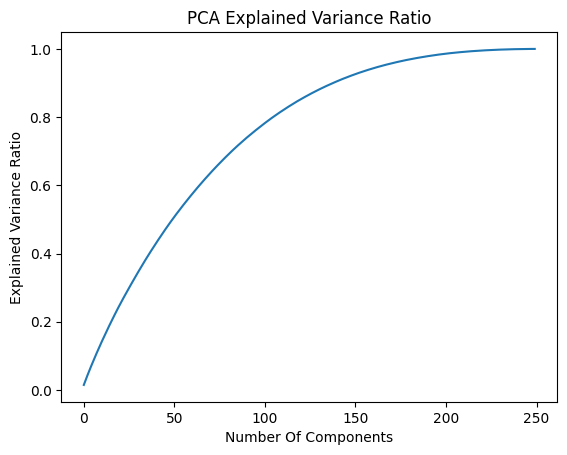

In [65]:
from sklearn.decomposition import PCA

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.linear_model import LogisticRegression


sklearn.set_config(transform_output="pandas")

decomp = make_pipeline(StandardScaler(),
                       PCA())

y = train['target']
x = train.drop("target", axis=1)

# See the PCA's components
pca_comps = decomp.fit_transform(x,y)

variances = decomp[-1].explained_variance_ratio_

sums = np.cumsum(variances)

import matplotlib.pyplot as plt 

plt.title("PCA Explained Variance Ratio")
plt.xlabel("Number Of Components")
plt.ylabel("Explained Variance Ratio")
plt.plot(sums)

num_componenst_90 = np.argwhere(sums > .90)[0][0]

print(f'90% of variance is explained by {num_componenst_90} components')



In [66]:


final_pipeline = make_pipeline(StandardScaler(),
                       PCA(n_components=num_componenst_90), 
                       LogisticRegression(solver="liblinear"))

final_pipeline.fit(x,y)

y_pred = final_pipeline.predict(test)

submission = pd.DataFrame()
submission['id'] = test['id']
submission['target'] = y_pred

submission.to_csv("dont_overfit_submisison.csv", header=True, index=False)


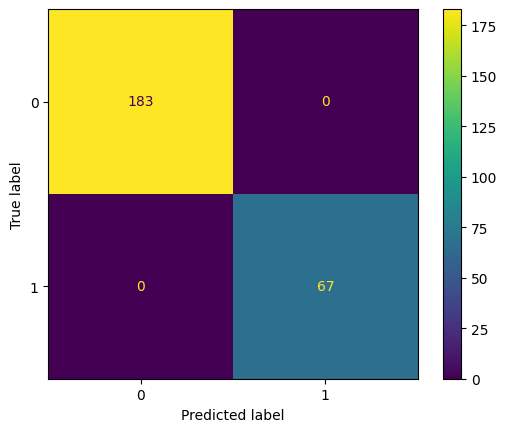

In [67]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix = confusion_matrix(y, final_pipeline.predict(x))

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix).plot()